In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import sys
from evaluate import test_policy
from evaluate import test_policy_array
from industrialbenchmark.industrial_benchmark_openai.rllab_IB import rllab_IB
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
np.random.seed(549979191)
horizons = [20]

rs_all = {}
rs_q_all = {}
for horizon in [30]:
    print("horizon outer {}".format(horizon))
    rs = {}
    rs_q = {}
    for i, h in enumerate(horizons):
        print("horizon inner {}".format(h))
        rs[h] = np.zeros(50)
        rs_q[h] = np.zeros((50, 2))
        for seed in range(50):
            if seed % 10 == 0: print(seed)
            filename = "IB_ddpg_snapshots/"
            filename += "horiz" + str(h) + "seed" + str(seed) + "hlayer300"
            env = rllab_IB(horizon=30, markov_state=False)
            res = test_policy(policy_path=filename, horizon=horizon, env=env, policy_itr=1000, ntrials=50)
            mean_res = np.mean(res)
            rs[h][seed] = mean_res
            data = pd.read_csv(filename + '/train_stats.csv', sep=",") 
            rs_q[h][seed] =  (mean_res, np.mean(data["AverageQ"][900:]))
    rs_all[horizon] = rs
    rs_q_all[horizon] = rs_q



horizon outer 30
horizon inner 20
0


/home/jeanbetterton/miniconda3/envs/rllab3/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


10
20
30
40


In [4]:
rs_all[30][20]

array([ -56.73748954, -107.04178458,  -90.51556776, -107.03064007,
        -56.45410132,  -89.64569707,  -66.8728114 ,  -88.97737259,
       -107.0136539 ,  -66.97204324, -107.05177358, -107.03599221,
       -107.08175069, -107.02139196,  -90.01969155,  -88.96193802,
        -56.59435749,  -56.59516587,  -56.54615473,  -90.43580654,
        -90.73153547, -106.98023727,  -67.27745364, -106.99429419,
        -67.7923154 ,  -67.0450118 ,  -56.65008867,  -56.65365268,
        -89.16156539, -106.98306432,  -67.51384297,  -56.51936346,
        -56.56090409,  -56.65210381, -107.01780338, -106.98555382,
       -107.0060111 ,  -67.39779193,  -56.6406563 ,  -89.85590417,
        -56.53772661,  -90.36591714,  -56.58388329, -107.0309755 ,
        -66.97658788,  -88.96693059, -107.05082141,  -56.48693188,
        -67.43753545,  -67.11691392])

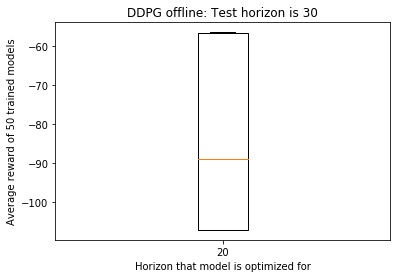

In [5]:
for test_horizon in sorted(rs_all):
    data = np.zeros((len(horizons), 50))
    for i, h in enumerate(sorted(rs_all[test_horizon])):
        data[i] = rs_all[test_horizon][h]
    plt.boxplot(data.T, labels=horizons)
    plt.xlabel("Horizon that model is optimized for")
    plt.ylabel("Average reward of 50 trained models")
    plt.title("{}: Test horizon is {}".format("DDPG offline", test_horizon))
    plt.show()

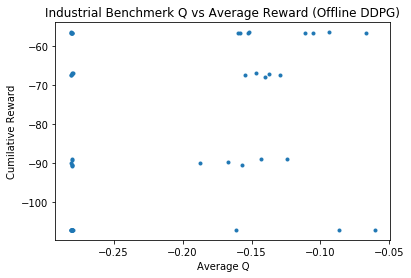

In [7]:
plt.plot(rs_q_all[30][20][:,1], rs_q_all[30][20][:,0], ".")
plt.xlabel("Average Q")
plt.ylabel("Cumilative Reward")
plt.title("Industrial Benchmerk Q vs Average Reward (Offline DDPG)")
plt.show()

In [6]:
rs_q_all[30][20][:,1]

array([-0.0671234 , -0.16091343, -0.28002095, -0.28008847, -0.0941237 ,
       -0.1667003 , -0.27986144, -0.28032562, -0.28027809, -0.27936277,
       -0.27997396, -0.27920885, -0.08648577, -0.28089903, -0.28052779,
       -0.12453269, -0.10532359, -0.28081534, -0.28112627, -0.15692034,
       -0.27986375, -0.28027952, -0.15492653, -0.28077385, -0.14040684,
       -0.27985476, -0.28041337, -0.2805179 , -0.2801275 , -0.06043276,
       -0.28053578, -0.15189094, -0.15259822, -0.15798251, -0.2800889 ,
       -0.28055672, -0.28025135, -0.28100011, -0.15990461, -0.18731738,
       -0.11138615, -0.28047127, -0.27991492, -0.28015712, -0.1465983 ,
       -0.14330325, -0.28088742, -0.28093025, -0.12925852, -0.13702501])

In [3]:
np.random.seed(221860149)
horizons = [20]
exts = ["", "online", "markov", "markovonline"]

rs_all_exts = {} 
for ext in exts:
    means_all = {}
    standard_devs_all = {}
    rs_all = {}
    for horizon in [30]:
        print("horizon outer {}".format(horizon))
        means = np.zeros(len(horizons))
        standard_devs = np.zeros(len(horizons))
        rs = {}
        totals = {}
        for i, h in enumerate(horizons):
            print("horizon inner {}".format(h))
            rs[h] = []
            results = np.zeros(0)
            for seed in range(50):
                if seed % 10 == 0: print(seed)
                filename = "IB_ddpg_snapshots/"
                filename += "horiz" + str(h) + "seed" + str(seed) + ext
                ms = False
                if ext == "markov" or ext == "markovonline":
                    ms = True
                env = rllab_IB(horizon=30, markov_state=ms)
                res = test_policy(policy_path=filename, horizon=horizon, env=env, policy_itr=1000, ntrials=50)
                results = np.append(results, res)
                rs[h].append(np.mean(res))
            means[i] = np.mean(results)
            standard_devs[i] = np.std(results)
        means_all[horizon] = means
        standard_devs_all[horizon] = standard_devs
        rs_all[horizon] = rs
    rs_all_exts[ext] = rs_all 

horizon outer 30
horizon inner 20
0


/home/jeanbetterton/miniconda3/envs/rllab3/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


10
20
30
40
horizon outer 30
horizon inner 20
0
10
20
30
40
horizon outer 30
horizon inner 20
0
10
20
30
40
horizon outer 30
horizon inner 20
0
10
20
30
40


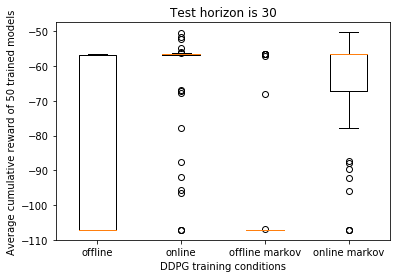

In [4]:
exts = ["", "online", "markov", "markovonline"]
labels = ["offline", "online", 
                "offline markov", "online markov"]

data = np.zeros((len(exts), 50))
for i, ext in enumerate(exts):
    rs_all = rs_all_exts[ext]
    data[i] = rs_all[30][20]
plt.boxplot(data.T, labels=labels)
plt.xlabel("DDPG training conditions")
plt.ylabel("Average cumulative reward of 50 trained models")
plt.title("Test horizon is {}".format(30))
plt.show()
    
    
    

In [8]:
for ext in rs_all_exts:
    m = np.mean(rs_all_exts[ext][30][20])
    print(ext + " " + str(m))

 -90.6636005464
markov -100.198426139
online -63.2414923203
markovonline -64.2980650253


In [14]:
for ext in rs_all_exts:
    m = np.max(rs_all_exts[ext][30][20])
    print(ext + " " + str(m))

 -56.4394313653
markov -56.5399721858
online -50.5993689803
markovonline -50.3300004991


In [9]:
np.random.seed(718020737)
horizons = [20]

means_all = {}
standard_devs_all = {}
rs_all = {}
for horizon in [30]:
    print("horizon outer {}".format(horizon))
    means = np.zeros(len(horizons))
    standard_devs = np.zeros(len(horizons))
    rs = {}
    totals = {}
    for i, h in enumerate(horizons):
        print("horizon inner {}".format(h))
        rs[h] = []
        results = np.zeros(0)
        for seed in range(50):
            if seed % 10 == 0: print(seed)
            filename = "IB_ddpg_snapshots/"
            filename += "horiz" + str(h) + "seed" + str(seed) + "hlayer300"
            env = rllab_IB(horizon=30, markov_state=False)
            res = test_policy(policy_path=filename, horizon=horizon, env=env, policy_itr=1000, ntrials=100)
            results = np.append(results, res)
            rs[h].append(np.mean(res))
        means[i] = np.mean(results)
        standard_devs[i] = np.std(results)
    means_all[horizon] = means
    standard_devs_all[horizon] = standard_devs
    rs_all[horizon] = rs


horizon outer 30
horizon inner 20
0
10
20
30
40


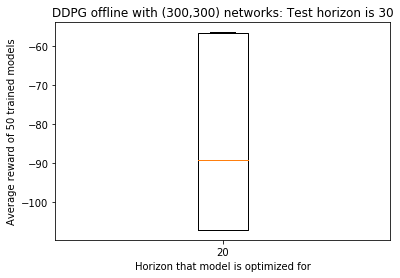

In [10]:
for test_horizon in sorted(rs_all):
    data = np.zeros((len(horizons), 50))
    for i, h in enumerate(sorted(rs_all[test_horizon])):
        data[i] = rs_all[test_horizon][h]
    plt.boxplot(data.T, labels=horizons)
    plt.xlabel("Horizon that model is optimized for")
    plt.ylabel("Average reward of 50 trained models")
    plt.title("DDPG offline with (300,300) networks: Test horizon is {}".format(test_horizon))
    plt.show()

In [11]:
np.mean(rs_all[30][20])

-81.091153524388645

In [13]:
np.max(rs_all[30][20])

-56.450209394572646